    
# ECON320-3 Assignment 7: James (Minkyu) Song 


In [ ]:
# Script name: james_song_assignment_07.ipynb
# Purpose of script: Assignment 7 of ECON320 with Dr.O'Connell
# Author: James (Minkyu) Song
# Date Created: October 24th 2022
# --------------------------
# Notes: NA
# ---------------------------


# Assignment 7

## Part I

* Objective: Simulate data, draw 1,000 random samples, and generate sample estimates, show sampling distribution of the estimated parameter.*

* Reference: Wooldridge (7th edition), Chapter 3, Section 3*

Consider the following data-generating process (population regression function):
$$y_i = 2.5 + 1.5 * x_i + u_i$$
where X ~ N(10,10) and U ~ N(0,5). X and U are independent.

a. Generate a dataset of 100,000 observations from this DGP. Call this the “population data”.


In [15]:
import math

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

from ECON320_lib import rm_components
# I have set up a library (folder) where there are functions that are often reused for this ECON320 class.
# This library will be subject to change as the course progresses.
# below is the link for reference.
# https://github.com/mkjames98/college_courses/tree/main/ECON320_lib

In [16]:
birthday_string = "04021998" # using the birthday string as rng
b0 = 2.5 # given
b1= 1.5 # given
rng = np.random.RandomState(int(birthday_string))
x = rng.normal(loc = 10, scale= 10, size = 100_000)
u = rng.normal(loc = 0, scale= 5, size = 100_000)
y = b0+b1*x+u
gdata= {"x": x, "u": u, "y": y}
population_data = pd.DataFrame(data=gdata)
population_data.head()



,x,u,y
0,14.775725,2.105813,26.769400
1,6.825120,-4.134796,8.602884
2,18.444533,-6.449390,23.717409
3,16.059732,-5.030403,21.559196
4,16.197484,-3.314077,23.482149



b. Draw a random sample of 1,000 observations from the population data. Estimate the parameters $β_0$ and $β_1$.

In [7]:
sample_df = population_data.sample(n = 1000, random_state= int(birthday_string))
sample_b0, sample_b1= rm_components.sample_betas(sample_df['x'], sample_df['y']) #using my imported method

covariance is: 150.21763445585748
sample b_0: 2.636245080696325
sample b_1: 1.478595465258301



c. Repeat step b 1,000 times, and save the estimated parameters from each draw.

In [12]:
estimated_params_1000 = []
for i in range(1, 1001):
    print(i)
    sample_df_loop = population_data.sample(n = 1000, random_state= int(birthday_string)+i) #passing the loop var to change random state in each iiteration
    sample_b0_loop, sample_b1_loop= rm_components.sample_betas(sample_df_loop['x'], sample_df_loop['y']) # using my function
    estimated_params_1000.append([sample_b0_loop, sample_b1_loop])

1
covariance is: 143.87739369198576
sample b_0: 2.4969150046367616
sample b_1: 1.486033941381734
2
covariance is: 154.17510007474758
sample b_0: 2.5362125862544573
sample b_1: 1.4907788315314245
3
covariance is: 143.92370611600796
sample b_0: 2.687852830116686
sample b_1: 1.4825476646932392
4
covariance is: 139.92231701287022
sample b_0: 2.7147022846570987
sample b_1: 1.4647429036439124
5
covariance is: 143.3671908125754
sample b_0: 2.6192401685758657
sample b_1: 1.5047669239387447
6
covariance is: 153.98434879792063
sample b_0: 2.4736426814025574
sample b_1: 1.491879458992805
7
covariance is: 159.82463497735787
sample b_0: 2.668455829797688
sample b_1: 1.4907713818426689
8
covariance is: 152.16505891857483
sample b_0: 2.344306813342815
sample b_1: 1.5147640708190129
9
covariance is: 151.4198219037906
sample b_0: 2.417289365863459
sample b_1: 1.4962181667587935
10
covariance is: 150.0170402345639
sample b_0: 2.815713925865964
sample b_1: 1.4745309834986746
11
covariance is: 135.9631181

In [13]:
estimated_params_df = pd.DataFrame(data= estimated_params_1000, columns = ['b0', 'b1'])
estimated_params_df

,b0,b1
0,2.496915,1.486034
1,2.536213,1.490779
2,2.687853,1.482548
3,2.714702,1.464743
4,2.619240,1.504767
...,...,...
995,2.595127,1.491094
996,2.928385,1.479720
997,2.710273,1.507281
998,2.550365,1.497322



d. Present histograms of the sampling distribution of the estimates of $β_0$ and $β_1$. Call these Figures 1 and 2 (with appropriate titles).


The distribution is plotted below.
Figure 1:


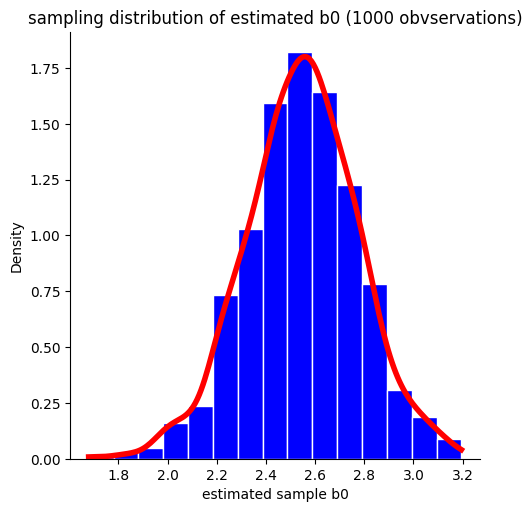

In [29]:
sample_b0_distribution_plot = sns.displot(
    data= estimated_params_df['b0'],
    bins=15,
    stat="density",
    kde=True,
    color="red",
    line_kws={"lw": 4},
    facecolor="blue",
    edgecolor="white",
    kind="hist",
)

plt.xlabel("estimated sample b0")
plt.title("sampling distribution of estimated b0 (1000 obvservations)")
print("The distribution is plotted below.")
print("Figure 1:")
plt.show()

The distribution is plotted below.
Figure 2:


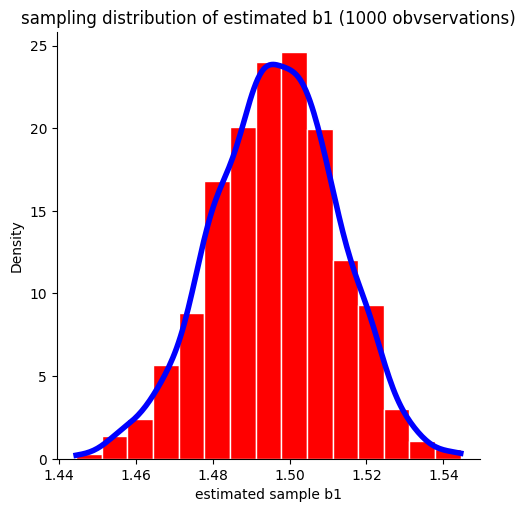

In [30]:
sample_b1_distribution_plot = sns.displot(
    data= estimated_params_df['b1'],
    bins=15,
    stat="density",
    kde=True,
    color="blue",
    line_kws={"lw": 4},
    facecolor="red",
    edgecolor="white",
    kind="hist",
)

plt.xlabel("estimated sample b1")
plt.title("sampling distribution of estimated b1 (1000 obvservations)")
print("The distribution is plotted below.")
print("Figure 2:")
plt.show()


e. What happens to the sampling distribution of the estimate of $β_1$ if U ~ N(0,50) or U ~ N(0,1)? Present two more histograms, Figures 3 and 4.


In [35]:
# U~N(0,50)
b0b0 = 2.5
b1b1= 1.5
xx = rng.normal(loc = 10, scale= 10, size = 100_000)
uu = rng.normal(loc = 0, scale= 50, size = 100_000)
yy = b0b0+b1b1*xx+uu
gdata2= {"x": xx, "u": uu, "y": yy}
population_data2 = pd.DataFrame(data=gdata2)
estimated_params_1000_2 = []

for i in range(1, 1001):
    print(i)
    sample_df_loop2 = population_data2.sample(n = 1000, random_state= int(birthday_string)+i)
    sample_b0_loop2, sample_b0_loop2= rm_components.sample_betas(sample_df_loop2['x'], sample_df_loop2['y'])
    estimated_params_1000_2.append([sample_b0_loop2, sample_b0_loop2])
estimated_params_df2 = pd.DataFrame(data= estimated_params_1000_2, columns = ['b0', 'b1'])

#########################################################################
# U~N(0,1)
b0b0b0 = 2.5
b1b1b1= 1.5
xxx = rng.normal(loc = 10, scale= 10, size = 100_000)
uuu = rng.normal(loc = 0, scale= 1, size = 100_000)
yyy = b0b0b0+b1b1b1*xxx+uuu
gdata3= {"x": xxx, "u": uuu, "y": yyy}
population_data3 = pd.DataFrame(data=gdata3)

estimated_params_1000_3 = []

for i in range(1, 1001):
    print(i)
    sample_df_loop3 = population_data3.sample(n = 1000, random_state= int(birthday_string)+i)
    sample_b0_loop3, sample_b0_loop3= rm_components.sample_betas(sample_df_loop3['x'], sample_df_loop3['y'])
    estimated_params_1000_3.append([sample_b0_loop3, sample_b0_loop3])    
estimated_params_df3 = pd.DataFrame(data= estimated_params_1000_3, columns = ['b0', 'b1'])

1
covariance is: 137.69370378512735
sample b_0: 3.119543632278628
sample b_1: 1.3981301292079293
2
covariance is: 165.24439107148655
sample b_0: 2.808728648506225
sample b_1: 1.6585042620086483
3
covariance is: 152.9066021833669
sample b_0: 2.6173485261139255
sample b_1: 1.5985463803842692
4
covariance is: 157.9100512486717
sample b_0: 3.181739700511624
sample b_1: 1.6289463367950554
5
covariance is: 153.4301356829927
sample b_0: 4.227486366910231
sample b_1: 1.535946752764372
6
covariance is: 127.21474322221947
sample b_0: 5.290031496494734
sample b_1: 1.253042422125641
7
covariance is: 169.64248807766117
sample b_0: -0.3194827107824736
sample b_1: 1.6948543565842973
8
covariance is: 127.49746238433312
sample b_0: 5.921369909601053
sample b_1: 1.3110024170294337
9
covariance is: 120.15886855373708
sample b_0: 4.7012342454069636
sample b_1: 1.271864855616212
10
covariance is: 178.84045729923048
sample b_0: 2.6878892140637944
sample b_1: 1.5802964336922463
11
covariance is: 167.44609813

The distribution is plotted below.
Figure 3:


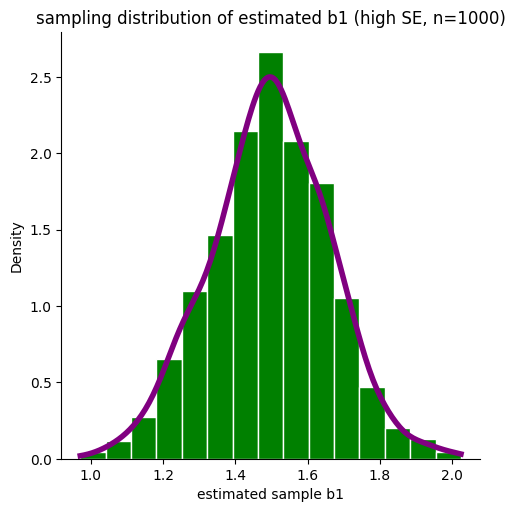

In [40]:
sample_b1_distribution_plot_high = sns.displot(
    data= estimated_params_df2['b1'],
    bins=15,
    stat="density",
    kde=True,
    color="purple",
    line_kws={"lw": 4},
    facecolor="green",
    edgecolor="white",
    kind="hist",
)

plt.xlabel("estimated sample b1")
plt.title("sampling distribution of estimated b1 (high SE, n=1000)")
print("The distribution is plotted below.")
print("Figure 3:")
plt.show()

The distribution is plotted below.
Figure 4:


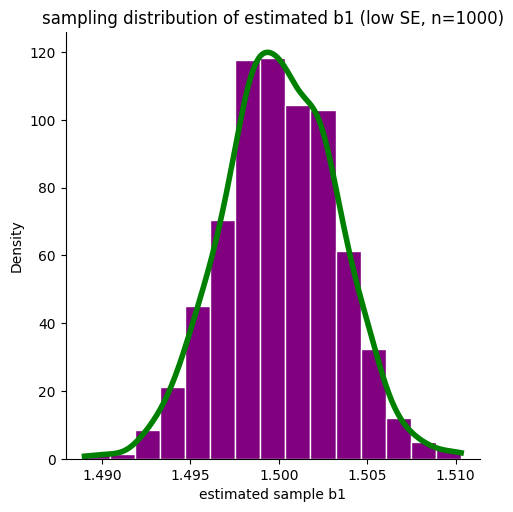

In [41]:
sample_b1_distribution_plot_low = sns.displot(
    data= estimated_params_df3['b1'],
    bins=15,
    stat="density",
    kde=True,
    color="green",
    line_kws={"lw": 4},
    facecolor="purple",
    edgecolor="white",
    kind="hist",
)

plt.xlabel("estimated sample b1")
plt.title("sampling distribution of estimated b1 (low SE, n=1000)")
print("The distribution is plotted below.")
print("Figure 4:")
plt.show()

We can see that the sampling distrbution is more centered around the population b1 as the variance/SE is smaller